## 確率
#### 確率分布

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats

In [2]:
df = sns.load_dataset('tips')
df['tip_rate'] = df['tip'] / df['total_bill']
df.head()

,total_bill,tip,sex,smoker,day,time,size,tip_rate
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808


In [3]:
# 一様分布からランダムにデータを生成する
# 離散型
stats.randint.rvs(1, 7)

5

In [4]:
stats.randint(1, 7).rvs()

3

In [5]:
stats.randint(1, 7).mean()

3.5

In [6]:
# 連続型
stats.uniform.rvs(0, 1)

0.36610560735062647

In [7]:
stats.uniform.mean(0, 1)

0.5

#### 離散型確率関数と連続型確率関数

#### 確率分布の描画

In [8]:
def simple_func(x):
    return x**2 + 3

In [9]:
simple_func(10)

103

In [10]:
# 描画
x = np.linspace(-3, 3, 100)
y = simple_func(x)

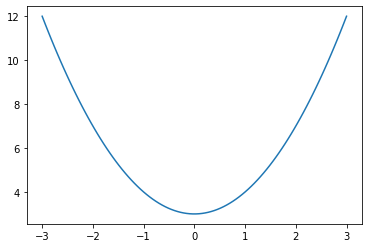

In [11]:
plt.plot(x, y)
plt.show()

In [12]:
x = np.arange(-3, 4)
y = simple_func(x)

<BarContainer object of 7 artists>

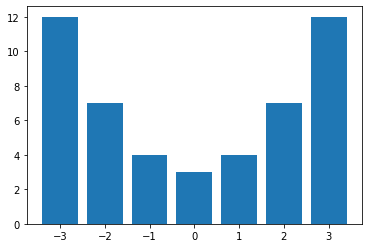

In [13]:
plt.bar(x, y)

In [14]:
x = np.arange(1, 7)
y = stats.randint(1, 7).pmf(x)

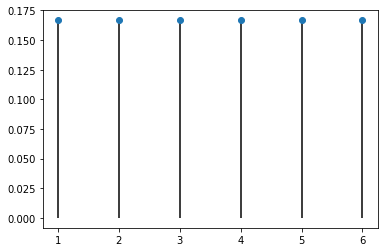

In [15]:
plt.plot(x, y, 'o')
plt.vlines(x, 0, y)
plt.show()

In [16]:
x = np.linspace(-2, 2, 100)
y = stats.uniform(loc=0, scale=1).pdf(x)

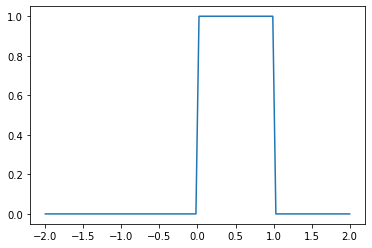

In [17]:
plt.plot(x, y)

### 確率分布
#### 連続型確率密度関数の場合、面積が確率になる

### 累積分布関数（CDF）
#### 確率密度関数を負の無限大からある値（ｘ）まで確率を積み上げた値を返す関数

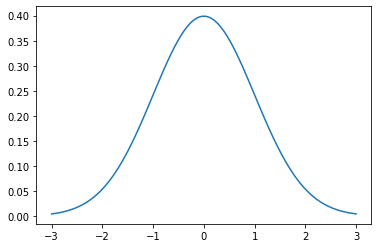

In [19]:
# CDF
x = np.linspace(-3, 3, 100)
y = stats.norm.pdf(x)
plt.plot(x, y)

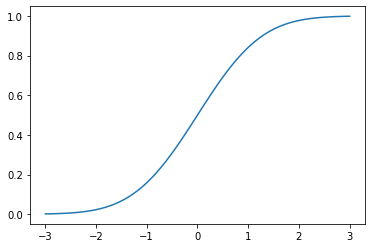

In [20]:
y = stats.norm.cdf(x)
plt.plot(x, y)

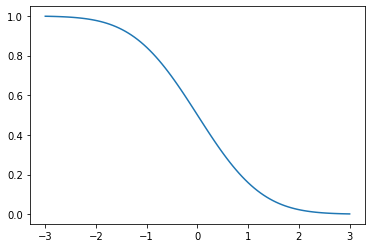

In [22]:
# 確率密度関数の右側の面積を表示する
y = stats.norm.sf(x)
plt.plot(x, y)

### 正規分布
##### stats.norm .rvs()...分布からランダムに値を取得
#####           .pdf()...指定した値（ｘ）に対する値（ｙ）を返す
#####           .cdf()...指定した値（ｘ）に対する値（ｙ）を返す（pdfの面積の値）
#####           .sf() ...1 - cdf の正確な値
#####           .mean()..平均を返す
#####           .var()...分散を返す
#####           .std()...標準偏差を返す

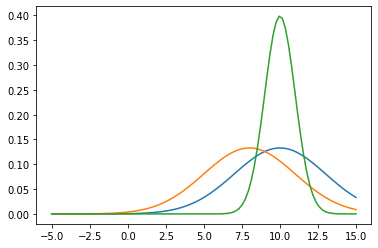

In [34]:
x = np.linspace(-5, 15, 100)
y1 = stats.norm(loc=10, scale=3).pdf(x)
y2 = stats.norm(loc=8, scale=3).pdf(x)
y3 = stats.norm(loc=10, scale=1).pdf(x)

plt.plot(x, y1)
plt.plot(x, y2)
plt.plot(x, y3)

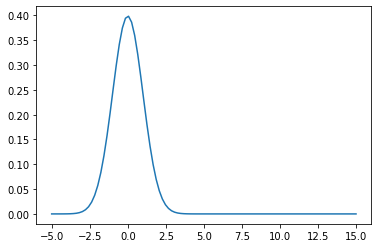

In [36]:
# 標準正規分布(平均０、標準偏差１)
y = stats.norm.pdf(x)
plt.plot(x, y)

### カーネル密度推定（KDF）
#### 観測した分布から確率密度関数（確率分布）を推定する

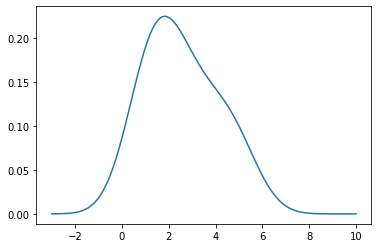

In [39]:
x = np.linspace(-3, 10, 100)
kde = stats.gaussian_kde([1, 1, 2, 2, 3, 4, 5])
y = kde.pdf(x)
plt.plot(x, y)

In [40]:
df.head()

,total_bill,tip,sex,smoker,day,time,size,tip_rate
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808


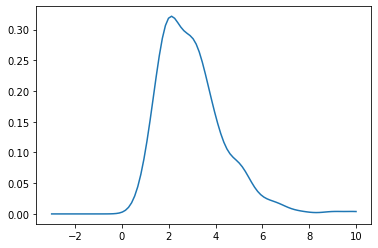

In [41]:
x = np.linspace(-3, 10, 100)
kde = stats.gaussian_kde(df['tip'])
y = kde.pdf(x)
plt.plot(x, y)

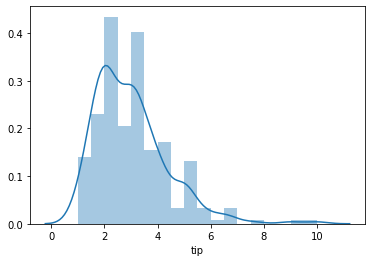

In [43]:
# KDEを描画する
sns.distplot(df['tip'], kde=True)

In [51]:
resample_data = stats.gaussian_kde(df['tip']).resample()
resample_data.shape

(1, 244)

#### ０以下はありえない場合など、境界線がある場合はミラーリングさせる
#### 2*bound-data計算すればOK

In [54]:
# １ドル以下のtipはありえないとすると
resample_data[resample_data<1.0]

array([ 0.52660282,  0.87737859, -0.39143743,  0.98445294,  0.66748788,
        0.94824704,  0.49609698,  0.76764394])

In [58]:
for i, v in enumerate(resample_data[0]):
    if v < 1.0:
        resample_data[0][i] = 2*1.0 - v

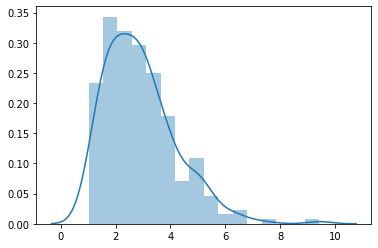

In [62]:
sns.distplot(resample_data)